<a href="https://colab.research.google.com/github/MohanPatil1/DS-And-DA-Assignments/blob/main/SMulti_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf


In [5]:
#Read the data
cars=pd.read_csv('Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [7]:
#Check for missing value
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

#Correlation Matrix

In [8]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


#Scatterplot between variable along with histogram

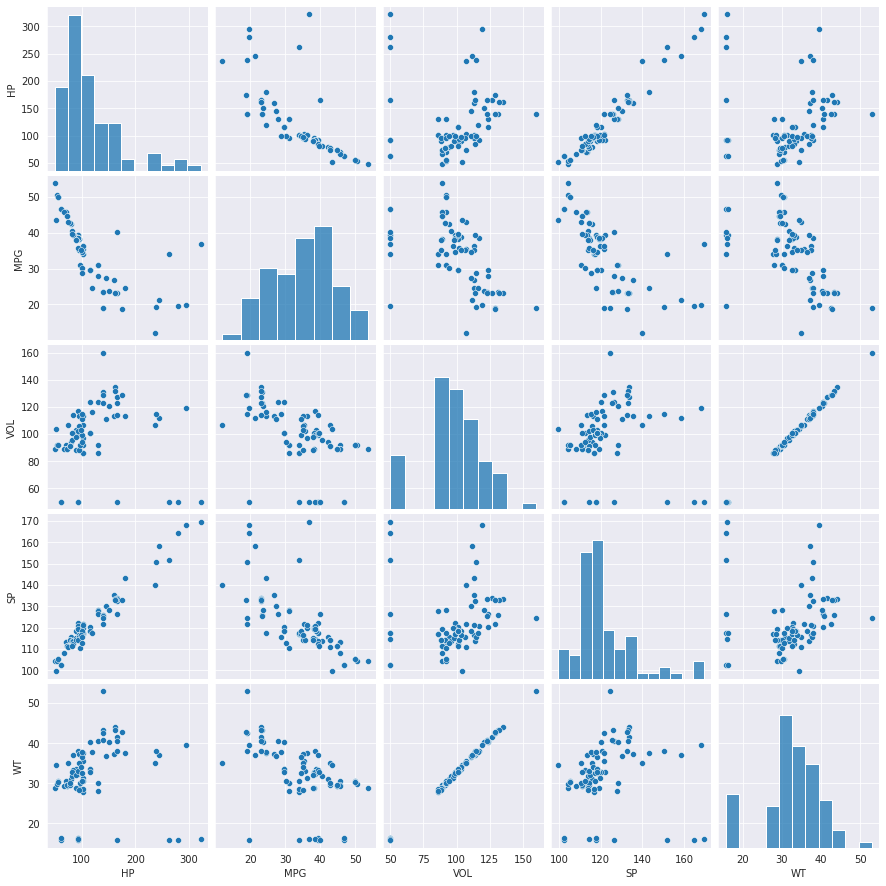

In [9]:
#Format the plot background and scatter plot for all variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

#Preparing Model

In [10]:
#Bulid model
model=smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [11]:
#Coefficients
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [12]:
#tvalues and pvalues
print('***t-values***','\n',model.tvalues,'\n','***p-values***','\n',model.pvalues)
# p values of SP and HP only are significant

***t-values*** 
 Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 ***p-values*** 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [13]:
# R Squared values
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

#Simple Linear Regression models

In [14]:
#Simple Linear Regression model for MPG And VOL
ml_v=smf.ols('MPG~VOL',data=cars).fit()
# t and P-Values
print(ml_v.tvalues,'\n',ml_v.pvalues)
# P-values 3.822819e-07 is approx 0 and < than alpha so VOL is Significant

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [15]:
ml_v.params

Intercept    55.817089
VOL          -0.216625
dtype: float64

In [16]:
#Simple Linear Regression model for MPG And WT
ml_w=smf.ols('MPG~WT',data=cars).fit()
# t and P-Values
print(ml_w.tvalues,'\n',ml_w.pvalues)
# P-values  4.383467e-07 is approx 0 and < than alpha so WT is Significant

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [17]:
ml_vw=smf.ols('MPG~VOL+WT',data=cars).fit()
print(ml_vw.tvalues,'\n',ml_vw.pvalues)#P values are greater than alpha

Intercept    12.545736
VOL          -0.709604
WT            0.489876
dtype: float64 
 Intercept    2.141975e-20
VOL          4.800657e-01
WT           6.255966e-01
dtype: float64


#Calculating VIF

In [18]:
rsq_hp = smf.ols('HP~WT+VOL+SP', data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt= smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt=1/(1-rsq_wt)

rsq_vol=smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared
vif_vol=1/(1-rsq_vol)

rsq_sp=smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared
vif_sp=1/(1-rsq_sp)

#Storing vif values in a dataframe
d1={'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


#Subset Selection

#AIC

In [19]:
#Build model with wt
import statsmodels.formula.api as smf
model=smf.ols('MPG~WT+SP+HP',data=cars).fit()
print(model.aic,rsq_wt)

476.29927501529767 0.9984363610296332


In [20]:
#Build model with VOL
import statsmodels.formula.api as smf
model=smf.ols('MPG~VOL+SP+HP',data=cars).fit()
print(model.aic,rsq_vol)

475.9875158854609 0.9984345797174133


#Test for Normality of Residual(Q-Q Plot)

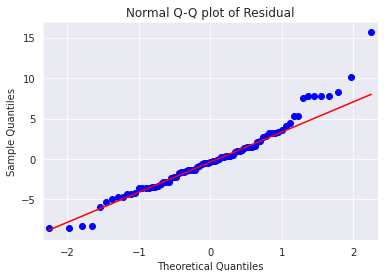

In [21]:
import statsmodels.api as sm
model=smf.ols('MPG~VOL+SP+HP',data=cars).fit()#Model.resid is error
qqplot=sm.qqplot(model.resid,line='q')# line =45 to draw the diagonal line
plt.title('Normal Q-Q plot of Residual')# Point that are away from line is outlier
plt.show()#Here some values are more than 10 y value

In [22]:
# to print index of values whose y values is more than 10
list(np.where(model.resid>10))

[array([ 0, 76])]

#Residual plot for Homoscedasticity:Constant Variance

In [23]:
#User define function for standardization
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()# this is z score=xi-mean/std.vals

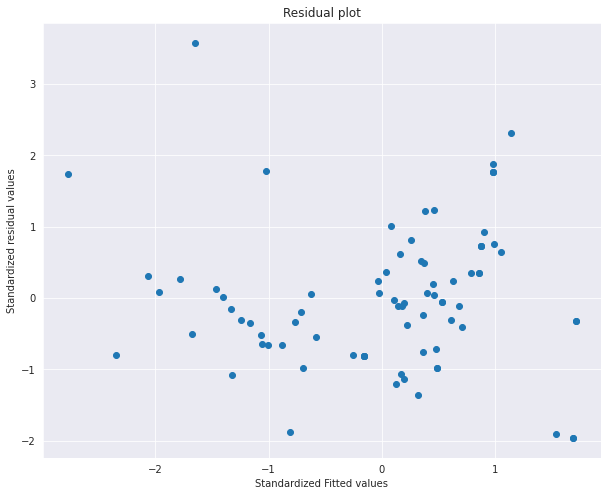

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(get_standardized_values(model.fittedvalues),#fitted values is y hat
            get_standardized_values(model.resid))  #resid is error 

plt.title('Residual plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#Residual vs Regressors

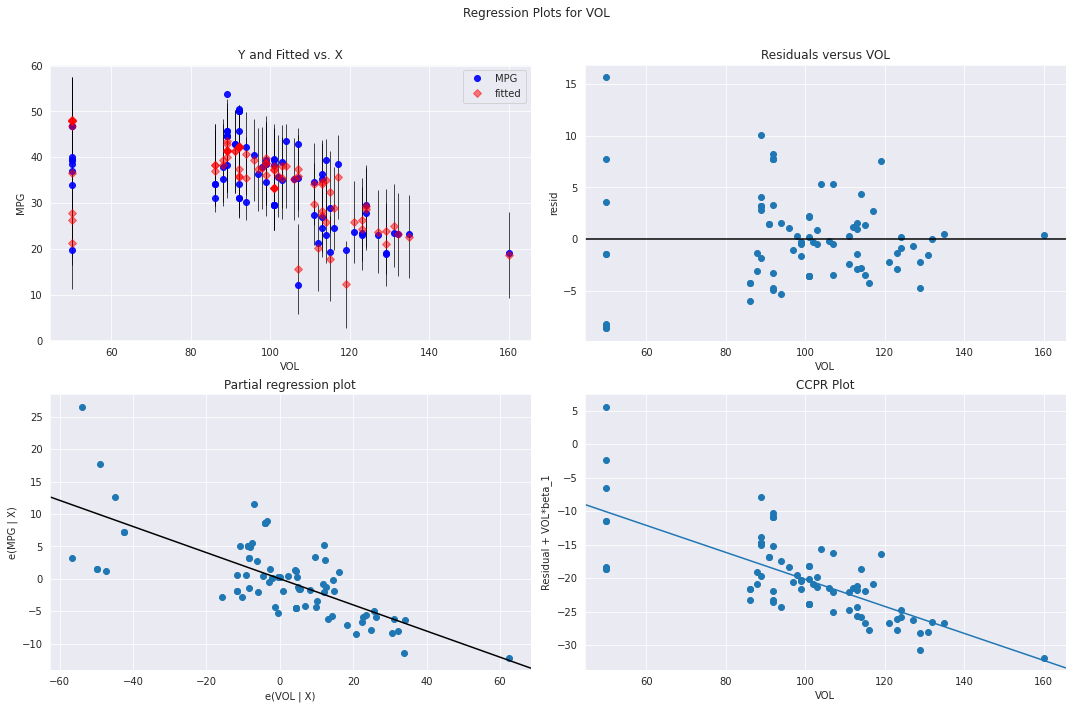

In [25]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'VOL',fig=fig)
plt.show()

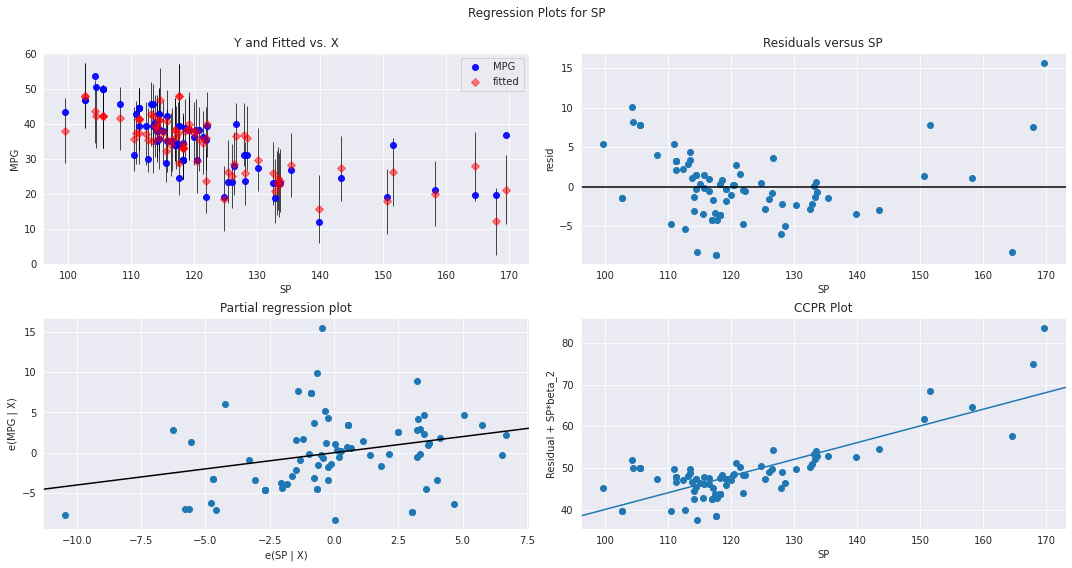

In [26]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'SP',fig=fig)
plt.show()

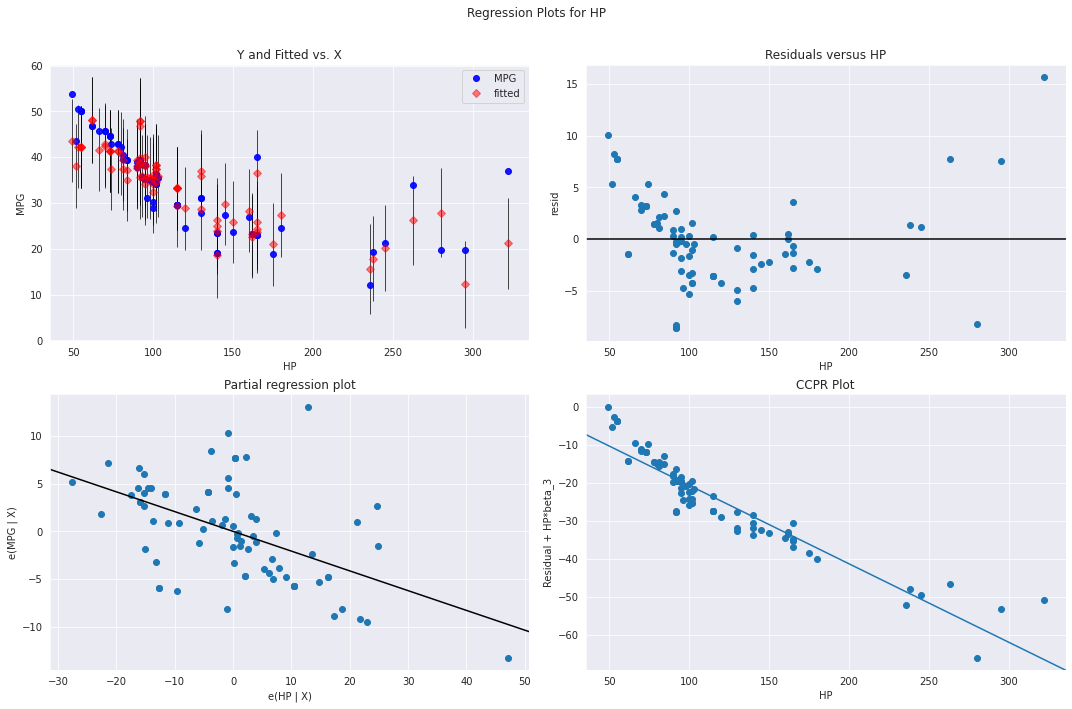

In [27]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

#Model Deletion Technique

Detecting Influencers/Outliers

Cooks Distance

In [28]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

<ipython-input-29-513a1927f6fe>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(cars)),np.round(c,3))# index values of cars on x-axis


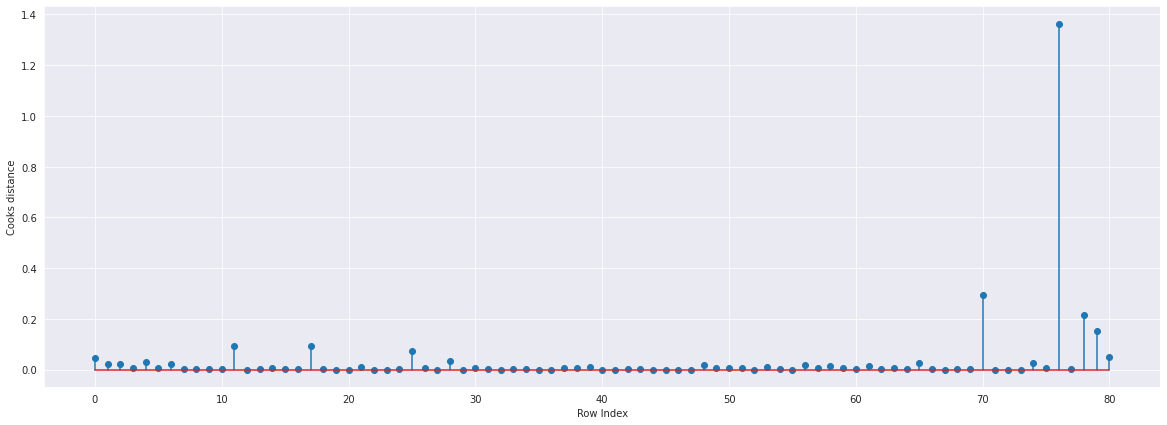

In [29]:
#plot the influencers values using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))# index values of cars on x-axis
plt.xlabel('Row Index')
plt.ylabel('Cooks distance')
plt.show()

In [30]:
#Index and values of influencers where c is more than
(np.argmax(c),np.max(c))#argmax () gives index values of max values in dataset

(76, 1.3641743869103298)

# High Influence points

In [31]:
cars.shape

(81, 5)

In [32]:
k=cars.shape[1]#k is no of variable
n=cars.shape[0]# n is no of data points
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.2222222222222222

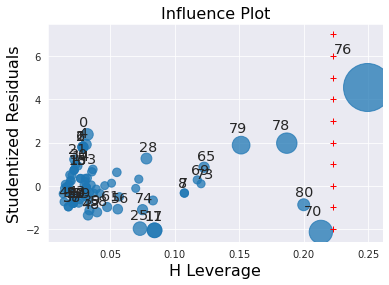

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alpha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

In [34]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


#Improving the model

In [74]:
cars_new=pd.read_csv('Cars.csv')

In [75]:
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [76]:
car1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [77]:
car1=car1.drop(['index'],axis=1)

In [78]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


#Build Model

In [79]:
#Exclude variable "WT" and generate R -squared and AIC values
final_ml_v=smf.ols('MPG~VOL+SP+HP',data=car1).fit()

In [80]:
final_ml_v.rsquared,final_ml_v.aic

(0.8161692010376006, 446.11722639447726)

In [81]:
#Exclude variable "VOL" and generate R -squared and AIC values
final_ml_w=smf.ols('MPG~WT+SP+HP',data=car1).fit()

In [82]:
final_ml_w.rsquared,final_ml_v.aic

(0.8160034320495304, 446.11722639447726)

In [83]:
model_influence_v=final_ml_v.get_influence()
(c_v,_)=model_influence.cooks_distance
#find again if any data point has high influence or oulier

In [85]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)), np.round(c_v,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [87]:
#find  the index that data point more than 1
(np.argmax(c_v),np.max(c_v))

(76, 1.3641743869103298)

In [88]:
#Drop 76 and 77 observation
car2=car1.drop(car1.index[[76,77]],axis=0).reset_index()

In [90]:
car3=car2.drop(['index'],axis=1)

In [91]:
#build the model on new data
final_ml_V=smf.ols('MPG~VOL+SP+HP',data=car3).fit()

In [92]:
#Again check for influencer
model_influence_V=final_ml_V.get_influence()
(c_V,_)=model_influence_V.cooks_distance

<ipython-input-95-c8d0fc776e06>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(car3)),np.round(c_V,3));


Text(0, 0.5, 'Cooks distance')

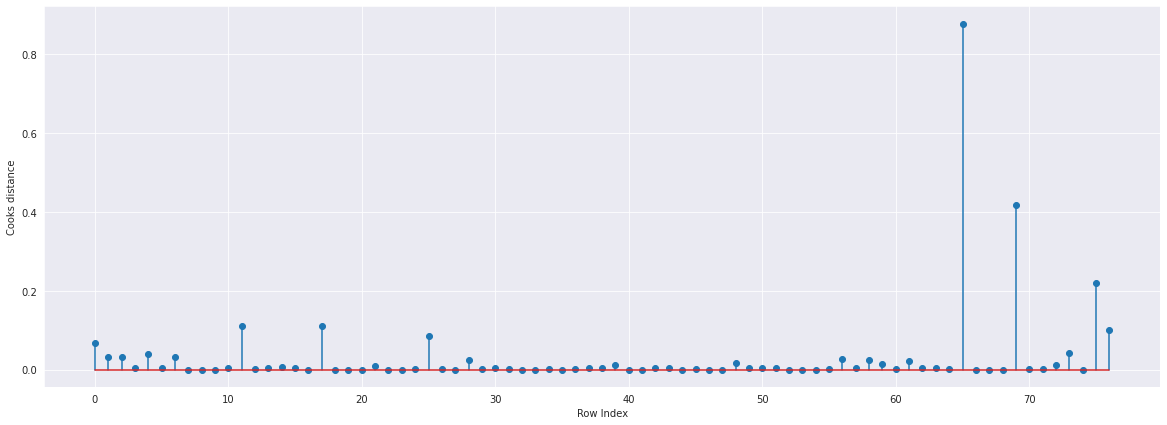

In [95]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car3)),np.round(c_V,3));
plt.xlabel('Row Index')
plt.ylabel('Cooks distance')

In [97]:
(np.argmax(c_V),np.max(c_V))

(65, 0.8774556986296681)

In [98]:
#check the accuracy of model
final_ml_V=smf.ols('MPG~VOL+SP+HP',data=car3).fit()

In [99]:
(final_ml_V.rsquared,final_ml_V.aic)#Compare with 1st model values .it was 0.77 and now its 0.86

(0.866963611185906, 409.41530627195095)

#Predicting For new data

In [100]:
#New Data for Prediction-what will be mpg for follow values?
new_data=pd.DataFrame({'HP':40,'VOL':95,'SP':102,'WT':35},index=['index 1'])

In [102]:
new_data

,HP,VOL,SP,WT
index 1,40,95,102,35


In [103]:
final_ml_V.predict(new_data)

index 1    46.035594
dtype: float64